In [ ]:
#I have chosen ECG signal to measure heart rate as it is accurate since it measures electrical activity of heart where as PPG
#gives an after information when a heart beat is leading to expansion and contraction of blood vessels.
#PPG is therefore, better used as a reference for static Heart Rate comparison
#SCG is also not suitable since it measures the mechanical vibrations at the chest wall which are usually interfered by breathing.
#However due to rich set of signals in SCG, it is very suitable for knowing health status of a heart

In [2]:
#first a panda series containing whole data is created
import pandas as pd

In [3]:
#adding columns explicitly
whole_data=pd.read_csv('biological_data2.csv',names = ['timestamp','stype','svalue1','svalue2','svalue3','svalue4','svalue5','svalue6','svalue7','svalue8'])
whole_data.head()

,timestamp,stype,svalue1,svalue2,svalue3,svalue4,svalue5,svalue6,svalue7,svalue8
0,1489577803572,1,1251323,1255899,1260163,1265777,1278019,NaN,NaN,NaN
1,1489577803613,1,1284469,1281837,1283630,1286204,1289904,NaN,NaN,NaN
2,1489577803655,1,1292391,1294136,1294613,1298420,1306429,NaN,NaN,NaN
3,1489577803696,1,1309257,1310302,1312566,1316189,1320997,NaN,NaN,NaN
4,1489577803737,1,1322548,1323961,1325421,1326048,1328162,NaN,NaN,NaN


In [4]:
#some useful imports
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
#we need to seperate ECG data from the whole data
#dropping the unnecessary columns -> svalue6,svalue7 & svalue8
ecg_data=whole_data.loc[(whole_data["stype"]==1), ['timestamp','stype','svalue1','svalue2','svalue3','svalue4','svalue5']]
ecg_data.head()

,timestamp,stype,svalue1,svalue2,svalue3,svalue4,svalue5
0,1489577803572,1,1251323,1255899,1260163,1265777,1278019
1,1489577803613,1,1284469,1281837,1283630,1286204,1289904
2,1489577803655,1,1292391,1294136,1294613,1298420,1306429
3,1489577803696,1,1309257,1310302,1312566,1316189,1320997
4,1489577803737,1,1322548,1323961,1325421,1326048,1328162


In [6]:
#now we need to associate each signal value with the corresponding timestamp to be able to plot the data and hence calculate
#R-R interval
columns = [' timestamp',' svalue']
df = pd.DataFrame(columns=columns)
df

,timestamp,svalue


In [7]:
#Analysis of data is required to avoid any mistakes
#calculating diff so as to evenly distribute timestamps
ecg_data['timestamp']-ecg_data['timestamp'].shift(1)
#here 42 and 17 are interesting points, wherease the usual diff is 41

0       NaN
1      41.0
2      42.0
3      41.0
4      41.0
5      41.0
6      41.0
7      41.0
8      41.0
9      41.0
10     41.0
11     17.0
12     41.0
13     41.0
14     41.0
15     41.0
16     41.0
17     41.0
18     41.0
19     41.0
20     41.0
21     41.0
22     41.0
23     41.0
24     41.0
25     41.0
26     41.0
27     41.0
28     41.0
29     41.0
       ... 
81     41.0
82     41.0
83     41.0
84     41.0
85     42.0
86     17.0
87     41.0
88     41.0
89     41.0
90     41.0
91     41.0
92     41.0
93     41.0
94     41.0
95     41.0
96     41.0
97     41.0
98     41.0
99     41.0
100    41.0
101    41.0
102    41.0
103    41.0
104    41.0
105    41.0
106    41.0
107    41.0
108    41.0
109    41.0
110    41.0
Name: timestamp, dtype: float64

In [67]:
#lets see how many such points are there
diff=(ecg_data['timestamp']-ecg_data['timestamp'].shift(1)==42).sum()
#we have 3 such points where we may face difficulty to distribute the time stamp
#we will therefore assume the diff to be 41 only and skip the required timestamp as at the end we need to average

3

In [69]:
#similary for "17"
diff=(ecg_data['timestamp']-ecg_data['timestamp'].shift(1)==17).sum()
diff
#here also we will assume 17 as 16 so that it can be easily divided by 5 (signal values)
#NOTE: If the diff between two timestamps(t and t+n) is n, then the distribution in the later one will start from t+1
#hence the difference n-1 should be a multiple of 5 to evenly distribute the timestamps

4

In [70]:
#other checks
diff=(ecg_data['timestamp']-ecg_data['timestamp'].shift(1)!=41).sum()
diff

8

In [ ]:
#8=4+3+"NaN Value", hence the interesting points are sorted
#errors in those 7 values could be assumed as device/sensor errors and 7/110(total rows) <<1 so can be tweaked

In [8]:
#now, we will start distributing timestamps
#for the first row, we assume the division bwteen consecutive signal values to be 40/5=8 (similar to most of the rows)
diff_data=ecg_data['timestamp']-ecg_data['timestamp'].shift(1)
columns = ['timestamp','svalue']
df = pd.DataFrame(columns=columns)  

In [9]:
i=0
for index, row in ecg_data.iterrows(): #each row of ecg_data is traversed column by column
    if(index==0 or diff_data[index-1]!=17 ): #to take care of NaN and points having 17 as a diff of timestamps
        k=40
    else:
        k=15
    ts=row['timestamp'] #last timestamp of the row
    ts_=ts-k #subtacting to get the timestamp to start adding divisions
    d=int(k/5) #divisions
    ts_=ts_+d #first column's timestamp
    df.loc[i] = [ts_,row['svalue1']]
    i+=1
    ts_=ts_+d #second column's timestamp
    df.loc[i] = [ts_,row['svalue2']]
    i+=1
    ts_=ts_+d #third column's timestamp
    df.loc[i] = [ts_,row['svalue3']]
    i+=1
    ts_=ts_+d #fourth column's timestamp
    df.loc[i] = [ts_,row['svalue4']]
    i+=1
    ts_=ts_+d #fifth column's timestamp
    df.loc[i] = [ts_,row['svalue5']]
    i+=1
print(df)
    

        timestamp     svalue
0    1.489578e+12  1251323.0
1    1.489578e+12  1255899.0
2    1.489578e+12  1260163.0
3    1.489578e+12  1265777.0
4    1.489578e+12  1278019.0
5    1.489578e+12  1284469.0
6    1.489578e+12  1281837.0
7    1.489578e+12  1283630.0
8    1.489578e+12  1286204.0
9    1.489578e+12  1289904.0
10   1.489578e+12  1292391.0
11   1.489578e+12  1294136.0
12   1.489578e+12  1294613.0
13   1.489578e+12  1298420.0
14   1.489578e+12  1306429.0
15   1.489578e+12  1309257.0
16   1.489578e+12  1310302.0
17   1.489578e+12  1312566.0
18   1.489578e+12  1316189.0
19   1.489578e+12  1320997.0
20   1.489578e+12  1322548.0
21   1.489578e+12  1323961.0
22   1.489578e+12  1325421.0
23   1.489578e+12  1326048.0
24   1.489578e+12  1328162.0
25   1.489578e+12  1328412.0
26   1.489578e+12  1330169.0
27   1.489578e+12  1331461.0
28   1.489578e+12  1332911.0
29   1.489578e+12  1335883.0
..            ...        ...
525  1.489578e+12  1414703.0
526  1.489578e+12  1413600.0
527  1.489578e

In [10]:
df.iloc[554,0] #check 

1489577807989.0

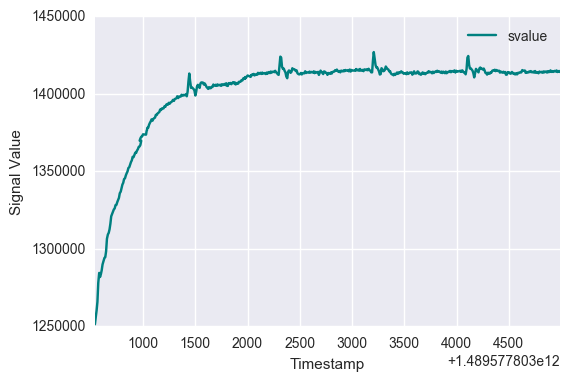

In [11]:
#plotting
ax=df.plot(x='timestamp', y='svalue',color='teal') 
ax.set_xlabel("Timestamp")
ax.set_ylabel("Signal Value")

In [55]:
#we notice that 4 peaks are there and we have to find heartbeat using the difference between corresponding time intervals


In [50]:
#numpy arrays essential for peak detection
signal_value= np.array(df['svalue'])
time_stamp=np.array(df['timestamp']) 

[  5 113 222 334 447 550]
[  1.48957780e+12   1.48957780e+12   1.48957781e+12   1.48957781e+12
   1.48957781e+12   1.48957781e+12] [ 1284469.  1413097.  1424002.  1426941.  1424423.  1415071.]


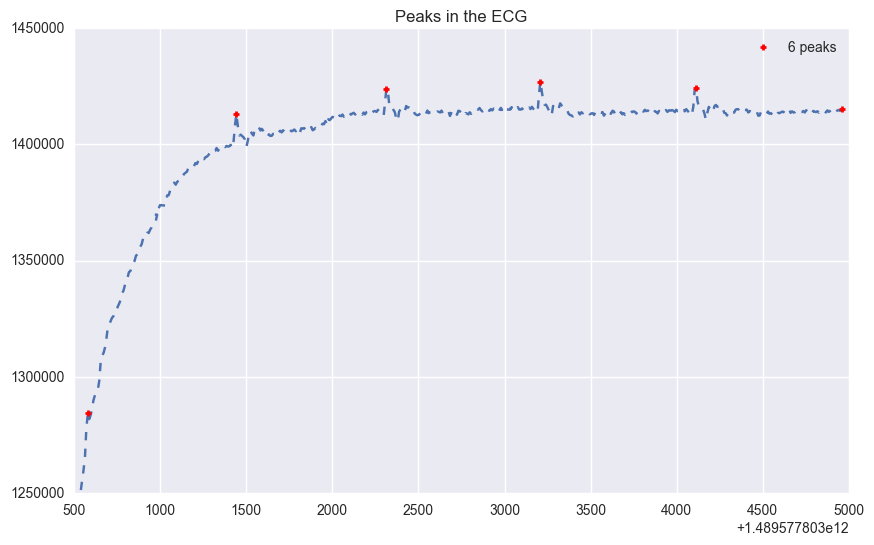

In [51]:
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
indexes = peakutils.indexes(signal_value, thres=0.02/max(cb), min_dist=100)
print(indexes)
print(time_stamp[indexes], signal_value[indexes])
pyplot.figure(figsize=(10,6))
pplot(time_stamp, signal_value, indexes)
pyplot.title('Peaks in the ECG')

In [56]:
#we observe the detection of peaks
#we are interested in middle points -> 113, 222, 334 & 447
peak_points=pd.Series([113,222,334,447])
r_r_intervals=pd.Series(time_stamp[peak_points])#corresponding timestamps
#assuming the intervals are in milliseconds, r_r_intervals needs to be divided by 1000 to get them in seconds (since interval
#between two beats should be in the range of 0.6 to 1 second)
r_r_intervals=r_r_intervals/1000
heart_rate=60/(r_r_intervals-r_r_intervals.shift(1)) #calculated heart_rate in beats/minutes
heart_rate_avg=int(heart_rate.mean()) #average heart rate as a whole number 
print("Calculated heart rate is", heart_rate_avg, "beats per minutes")

Calculated heart rate is 67 beats per minutes
